In [ ]:
# Import necessary libraries
from sklearn.manifold import TSNE
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.002s...
[t-SNE] Computed neighbors for 3000 samples in 0.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 6.744421
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.981323
[t-SNE] KL divergence after 1000 iterations: 1.282658


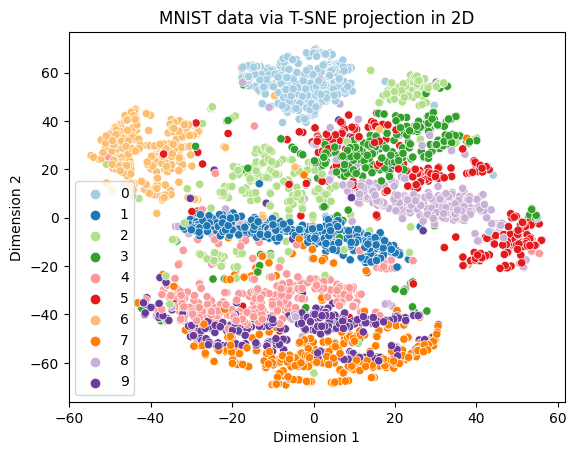


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.005s...
[t-SNE] Computed neighbors for 3000 samples in 1.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 6.744421
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.057053
[t-SNE] KL divergence after 1000 iterations: 1.104676


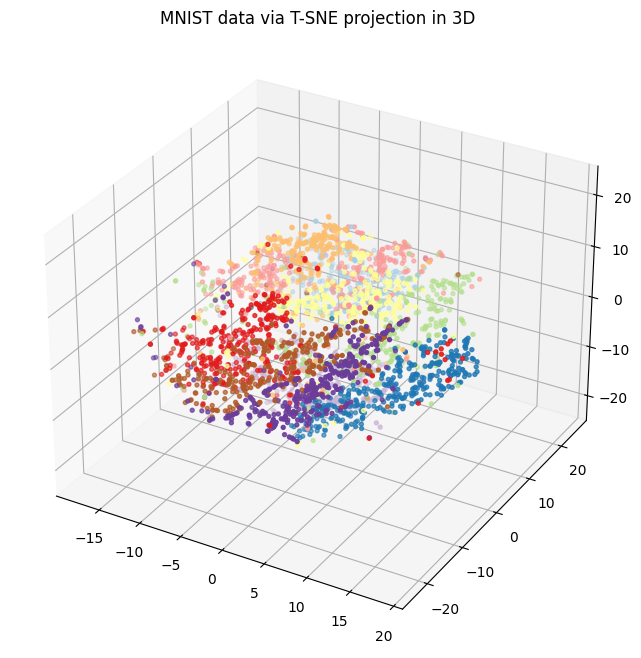

In [ ]:
def main():

  # Load MNIST dataset
  (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

  # X is a 3D array
  num_samples, width, height = X_train.shape
  # Reshape to a 2D array
  X_train = X_train.reshape((num_samples, width * height))

  # Normalize each feature
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)

  # Select part of the original data for visualization
  X_train = X_train[:3000]
  y_train = y_train[:3000]

  # 2D Visualization
  # Create a t-SNE instance
  two_dim_tsne = TSNE(n_components = 2, verbose = 1, random_state = 0)
  # Fit & transform the data
  z = two_dim_tsne.fit_transform(X_train)
  df = pd.DataFrame()
  df["y"] = y_train
  df["Dimension 1"] = z[:,0]
  df["Dimension 2"] = z[:,1]

  # Plot the results
  sns.scatterplot(x = "Dimension 1", y = "Dimension 2", hue = df.y.tolist(),
                  palette = sns.color_palette("Paired", 10),
                  data = df).set(title = "MNIST data via T-SNE projection in 2D")
  plt.show()
  print()

  # 3D Visualization
  # Create a t-SNE instance, fit & transform the data
  three_dim_tsne = TSNE(n_components = 3, verbose = 1, random_state = 0).fit_transform(X_train)

  # Plot the results
  fig = plt.figure(figsize = (10, 8))
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(three_dim_tsne[:, 0], three_dim_tsne[:, 1], three_dim_tsne[:,2],
            s = 8, c = y_train, cmap = "Paired")
  plt.title("MNIST data via T-SNE projection in 3D", fontsize=12);
  plt.show()

if __name__ == "__main__":
  main()